Install the necessary packages - peartree and osmnx

In [4]:
!pip install peartree

In [5]:
!pip install osmnx

In [6]:
#!pip install numpy==1.23

Mount Google Drive

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [8]:
import peartree as pt
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import numpy as np
%matplotlib inline

Upload zip file on to Google drive and reference it to a variable 'path'

In [9]:
path = '/content/drive/MyDrive/GTFS/ice.zip'

Use the inbuilt function in the peartree library to get the representatve GTFS feed as a partridge object

In [10]:
feed = pt.get_representative_feed(path)

In [11]:
#Just specifying a time period between which you can get the statistics - this can be modified based on the stop_times.txt file
start = 7*60*60  # 7:00 AM
end = 10*60*60  # 8:00 AM

Load feed as a graph using the given start and end times

In [12]:
G = pt.load_feed_as_graph(feed, start, end)

/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a futur

Generate the transit graph!

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

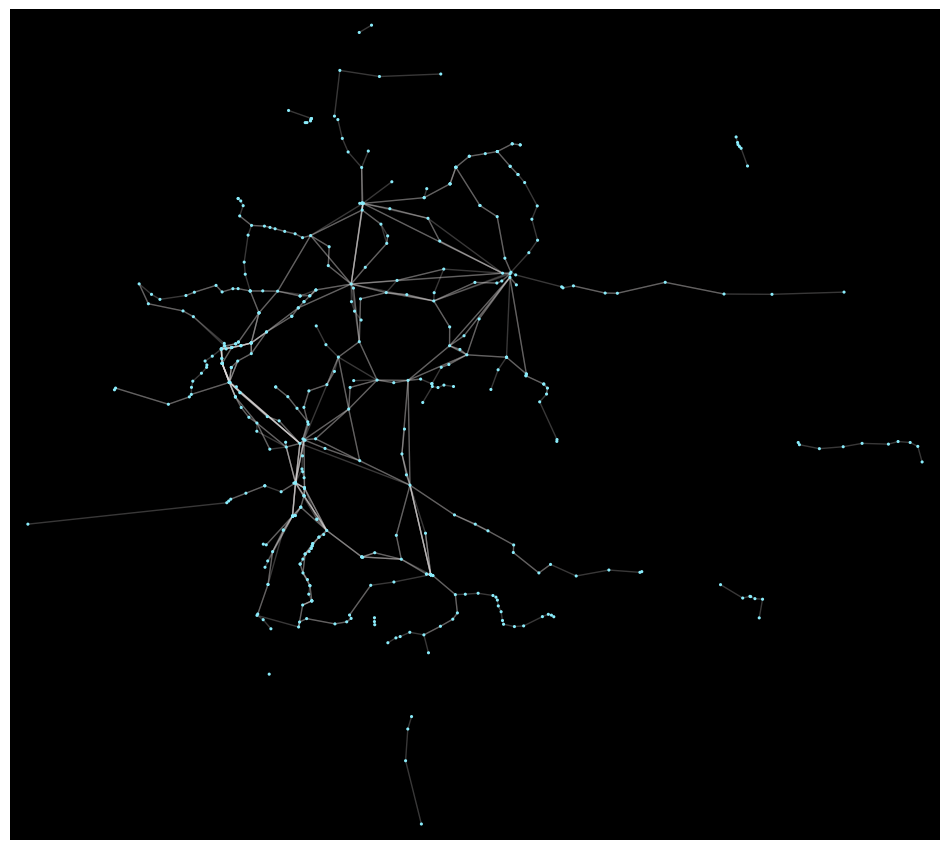

In [ ]:
pt.generate_plot(G)

Persistent Homology

In [13]:
!pip install ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=686956 sha256=6520d97f37ddcf456b5e0a39c3f023faadb85e82043ea144e3f8dd8982914448
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=cd6fe460c01a68b748a877eefae960e345482e52bb6d8149c4f682c09da1d055
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built ripser hopcroftkarp


In [14]:
dist_mat = nx.floyd_warshall_numpy(G)

In [16]:
from ripser import ripser

In [19]:
result = ripser(dist_mat, distance_matrix=True)

In [20]:
persistence_diagram = result['dgms']

In [23]:
!pip install persim

In [24]:
from persim import plot_diagrams

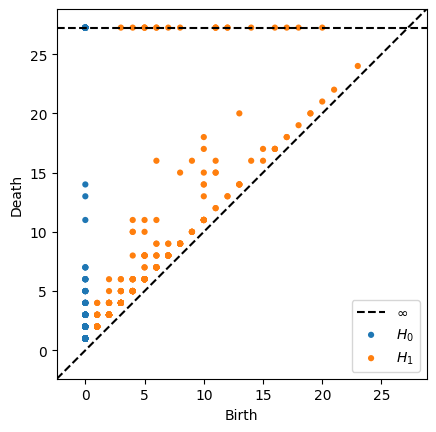

In [25]:
plot_diagrams(persistence_diagram)

For regional bahn data (S-Bahns, REs, RBs etc.)

In [ ]:
path_reg = '/content/drive/MyDrive/GTFS/regional.zip'

In [ ]:
feed_reg = pt.get_representative_feed(path_reg)

In [ ]:
#Just specifying a time period between which you can get the statistics - this can be modified based on the stop_times.txt file
start = 7*60*60  # 7:00 AM
end = 10*60*60  # 8:00 AM

In [ ]:
G_reg = pt.load_feed_as_graph(feed_reg, start, end)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for node_id, dist_val in nearest_nodes.iteritems():
/usr/local/lib/python3.10/dist-packages/peartree/graph.py:197: FutureWarning: ite

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

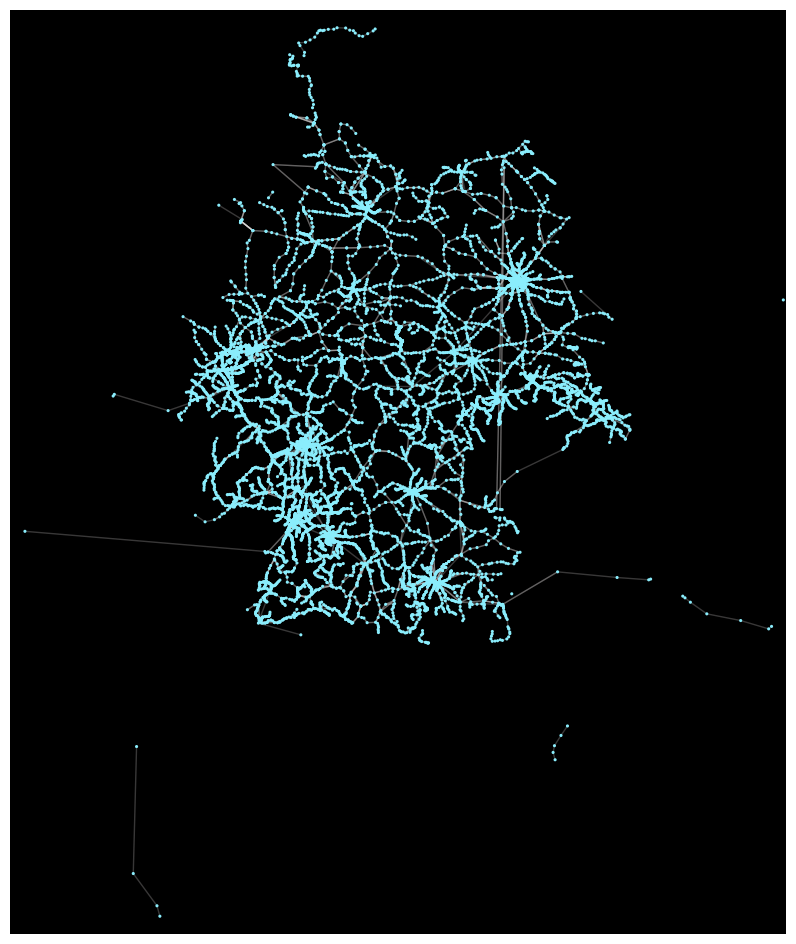

In [ ]:
pt.generate_plot(G_reg)

Convert to an undirected graph just to test for symmetry

In [ ]:
def convert_to_undirected(G):
  G_undirected = nx.Graph()

  for node in G.nodes():
    G_undirected.add_node(node)

    for source, target, key in G.edges(node,keys = True):
      G_undirected.add_edge(source, target)

  return G_undirected

In [ ]:
G_undirected = convert_to_undirected(G)

In [ ]:
G_undirected

Symmetry analysis

In [ ]:
def is_symmetric(graph):
    adj_matrix = nx.to_numpy_array(graph)
    transpose_matrix = np.transpose(adj_matrix)

    return np.array_equal(adj_matrix, transpose_matrix)

In [ ]:
if is_symmetric(G_undirected):
  print("Graph is symmetric")
else:
  print("Graph is not symmetric")

Graph is symmetric


In [ ]:
'''
is_symmetric = nx.is_isomorphic(G_undirected, G_undirected.reverse())
if is_symmetric:
  print("Graph is symmetric")
else:
  print("Graph is not symmetric")
'''

'\nis_symmetric = nx.is_isomorphic(G_undirected, G_undirected.reverse())\nif is_symmetric:\n  print("Graph is symmetric")\nelse:\n  print("Graph is not symmetric")\n'

Connectivity analysis

In [ ]:
#Check if the graph is connected to ensure reachability
nx.is_connected(G_undirected)

False

In [ ]:
#Find total number of connected components
nx.number_connected_components(G_undirected)

13

In [ ]:
#Largest connected component
max(nx.connected_components(G_undirected), key = len)

{'C11JE_102739',
 'C11JE_107657',
 'C11JE_10969',
 'C11JE_11115',
 'C11JE_115746',
 'C11JE_11658',
 'C11JE_117438',
 'C11JE_118838',
 'C11JE_119368',
 'C11JE_119997',
 'C11JE_123261',
 'C11JE_125397',
 'C11JE_126039',
 'C11JE_131031',
 'C11JE_135541',
 'C11JE_135957',
 'C11JE_136019',
 'C11JE_136269',
 'C11JE_137056',
 'C11JE_13765',
 'C11JE_141218',
 'C11JE_141452',
 'C11JE_14165',
 'C11JE_145683',
 'C11JE_146071',
 'C11JE_146080',
 'C11JE_146614',
 'C11JE_149561',
 'C11JE_15283',
 'C11JE_15362',
 'C11JE_154826',
 'C11JE_155238',
 'C11JE_157438',
 'C11JE_159788',
 'C11JE_160268',
 'C11JE_160808',
 'C11JE_163340',
 'C11JE_1641',
 'C11JE_16412',
 'C11JE_16561',
 'C11JE_165751',
 'C11JE_165882',
 'C11JE_166862',
 'C11JE_167003',
 'C11JE_168777',
 'C11JE_169145',
 'C11JE_170131',
 'C11JE_171959',
 'C11JE_174539',
 'C11JE_174896',
 'C11JE_17500',
 'C11JE_175871',
 'C11JE_178226',
 'C11JE_178459',
 'C11JE_17987',
 'C11JE_180939',
 'C11JE_181185',
 'C11JE_183214',
 'C11JE_18852',
 'C11JE_194

Centrality measures

In [ ]:
#Degree centrality
nx.degree_centrality(G)

{'C11JE_102739': 0.0042643923240938165,
 'C11JE_107657': 0.0042643923240938165,
 'C11JE_11115': 0.008528784648187633,
 'C11JE_115746': 0.0042643923240938165,
 'C11JE_117438': 0.008528784648187633,
 'C11JE_119368': 0.008528784648187633,
 'C11JE_125397': 0.006396588486140725,
 'C11JE_126039': 0.008528784648187633,
 'C11JE_135541': 0.006396588486140725,
 'C11JE_136019': 0.014925373134328358,
 'C11JE_136269': 0.006396588486140725,
 'C11JE_14165': 0.008528784648187633,
 'C11JE_145683': 0.006396588486140725,
 'C11JE_146071': 0.0042643923240938165,
 'C11JE_146080': 0.010660980810234541,
 'C11JE_146614': 0.006396588486140725,
 'C11JE_157438': 0.008528784648187633,
 'C11JE_159788': 0.019189765458422173,
 'C11JE_160268': 0.0021321961620469083,
 'C11JE_160808': 0.006396588486140725,
 'C11JE_163340': 0.008528784648187633,
 'C11JE_16412': 0.010660980810234541,
 'C11JE_166862': 0.010660980810234541,
 'C11JE_168777': 0.021321961620469083,
 'C11JE_170131': 0.017057569296375266,
 'C11JE_174539': 0.0106

In [ ]:
#Betweenness Centrality
nx.betweenness_centrality(G)

{'C11JE_102739': 0.004237056475862446,
 'C11JE_107657': 0.016645991775837057,
 'C11JE_11115': 0.0001628760957119166,
 'C11JE_115746': 0.001462467880378328,
 'C11JE_117438': 0.013334586786670481,
 'C11JE_119368': 0.0024104143507128585,
 'C11JE_125397': 0.012788620997576222,
 'C11JE_126039': 0.00617790170028976,
 'C11JE_135541': 0.03376432854044794,
 'C11JE_136019': 0.004326287660304398,
 'C11JE_136269': 0.004205164652925847,
 'C11JE_14165': 0.0048808312776931215,
 'C11JE_145683': 0.0,
 'C11JE_146071': 0.0,
 'C11JE_146080': 0.02065167700145406,
 'C11JE_146614': 0.0,
 'C11JE_157438': 0.004467133198476482,
 'C11JE_159788': 0.05086371718654967,
 'C11JE_160268': 0.0,
 'C11JE_160808': 0.013688830498447572,
 'C11JE_163340': 0.003457984801268383,
 'C11JE_16412': 0.005631184735662347,
 'C11JE_166862': 0.0021275642544299257,
 'C11JE_168777': 0.018733873607493495,
 'C11JE_170131': 0.03101603794729436,
 'C11JE_174539': 0.02071973046564376,
 'C11JE_17500': 0.030410793502738,
 'C11JE_178226': 0.01843

In [ ]:
#Converting the text file into a csv file
import csv

def convert_text_to_csv(input_file, output_file, delimiter=','):
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    with open(output_file, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file, delimiter=delimiter)
        for line in lines:
            row = [cell.strip() for cell in line.split(delimiter)]
            writer.writerow(row)

#Read the actual files
input_file_path = '/content/drive/MyDrive/GTFS/ICE_Transit/stops.txt'  # Replace with the path of the input text file
output_file_path = '/content/drive/MyDrive/GTFS/ICE_Transit/stops.csv'  # Replace with the desired path of the output CSV file

convert_text_to_csv(input_file_path, output_file_path, delimiter=',')

In [ ]:
#Getting the stop ids and stop names

import csv

def get_stop_dictionary(file_path):
    stop_dict = {}

    with open(file_path, 'r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            stop_name = row['stop_name']
            stop_id = row['stop_id']
            stop_dict[stop_name] = stop_id

    return stop_dict

# Example usage
file_path = '/content/drive/MyDrive/GTFS/ICE_Transit/stops.csv'  # Replace with the actual file path
stops_dictionary = get_stop_dictionary(file_path)

# Print the stop names and stop IDs
for stop_name, stop_id in stops_dictionary.items():
    print(f"Stop Name: {stop_name}, Stop ID: {stop_id}")

Stop Name: 's-Hertogenbosch, Stop ID: 325309
Stop Name: Aachen Hbf, Stop ID: 530226
Stop Name: Aachen Süd(Gr), Stop ID: 404644
Stop Name: "Aachen, Stop ID: Aachen"
Stop Name: Aarhus, Stop ID: 475047
Stop Name: Alfeld(Leine), Stop ID: 261826
Stop Name: Almelo, Stop ID: 555289
Stop Name: Altdorf(CH), Stop ID: 285717
Stop Name: Altena (Westfalen), Stop ID: 106099
Stop Name: Altena(Westf), Stop ID: 323783
Stop Name: Altenbeken, Stop ID: 635109
Stop Name: Amersfoort Centraal, Stop ID: 30766
Stop Name: Amsterdam Centraal, Stop ID: 499473
Stop Name: Amstetten NÖ, Stop ID: 91119
Stop Name: Andernach, Stop ID: 311167
Stop Name: Angermünde, Stop ID: 244683
Stop Name: "Angermünde, Stop ID: 
Stop Name: Angleur, Stop ID: 601678
Stop Name: Anklam, Stop ID: 67843
Stop Name: Anklam Bahnhof, Stop ID: 265143
Stop Name: Ansbach, Stop ID: 292412
Stop Name: Apeldoorn, Stop ID: 322422
Stop Name: Apolda, Stop ID: 318161
Stop Name: Arnhem Centraal, Stop ID: 316719
Stop Name: Arth-Goldau, Stop ID: 576828
Stop 

In [ ]:
def get_stop_ids(stops_dictionary):
  stop_ids = []

  for i in stops_dictionary.values():
    stop_id = i.split(':, ')[-1]
    stop_ids.append(stop_id)

city_nodes = get_stop_ids(stops_dictionary)

In [ ]:
#Verifying connectivity on a city level

def verify_city_connectivity(graph, city_nodes):
    visited = set()

    for node in city_nodes:
        if node not in visited:
            visited |= traverse_graph(graph, node)

    return visited

def traverse_graph(graph, start_node):
    visited = set()
    stack = [start_node]

    while stack:
        current_node = stack.pop()
        visited.add(current_node)

        neighbors = graph.neighbors(current_node)
        for neighbor in neighbors:
            if neighbor not in visited:
                stack.append(neighbor)

    return visited

In [ ]:
visited_nodes = verify_city_connectivity(G_undirected, city_nodes)

In [ ]:
#Check connectivity result
if len(visited_nodes) == len(G_undirected.nodes):
    print("The transit network is connected on a city level.")
else:
    print("The transit network has disconnected parts.")

The transit network has disconnected parts.


In [ ]:
#Eigenvector Centrality
#nx.eigenvector_centrality(G)

Clustering Coefficient

In [ ]:
#Get the local clustering coefficient of nodes
nx.clustering(G)

In [ ]:
nx.info(G,n=None)